In [1]:
%matplotlib inline
import pandas as pd# pandas is a data manipulation library
import matplotlib.pyplot as plt# data visualization library
import operator

In [2]:
#TASK 1
r_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
ratings = pd.read_csv(".\\ml-100k\\u1.base", sep='\t', names=r_cols, encoding='latin-1')

In [3]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(".\\ml-100k\\u.item", sep='|', names=m_cols, usecols=range(5),encoding='latin-1')

In [4]:
movie_ratings = pd.merge(movies, ratings, on='movie_id', how='inner')

In [5]:
movie_stats = movie_ratings.groupby('movie_id', as_index=False)['rating'].mean()

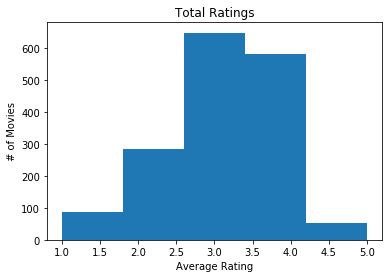

In [6]:
plt.hist(movie_stats['rating'], bins = 5)
plt.title("Total Ratings")
plt.xlabel("Average Rating")
plt.ylabel("# of Movies")
plt.show()

In [7]:
ratings_sorted = movie_stats.sort_values('rating', ascending=False)
top3 = pd.merge(movies, ratings_sorted.head(3), on='movie_id', how='inner')
top3[['movie_id', 'title', 'rating']]

,movie_id,title,rating
0,1189,Prefontaine (1997),5.0
1,1599,Someone Else's America (1995),5.0
2,1653,Entertaining Angels: The Dorothy Day Story (1996),5.0


In [8]:
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('.\\ml-100k\\u.user', sep='|', names=u_cols, encoding='latin-1')

In [9]:
movielens = pd.merge(movie_ratings, users, on='user_id')
ratings_by_gender = movielens.pivot_table('rating',index=['movie_id'], columns='gender', aggfunc='mean')

In [10]:
female_top_ratings = ratings_by_gender.sort_values('F', ascending=False)
top3_female = pd.merge(movies, female_top_ratings.head(3), on='movie_id', how='inner')
top3_female[['movie_id', 'title', 'F']]

,movie_id,title,F
0,1150,Last Dance (1996),5.0
1,1301,Stripes (1981),5.0
2,1594,Everest (1998),5.0


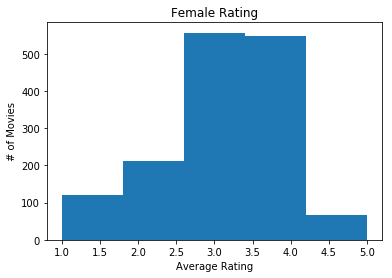

In [11]:
plt.hist(female_top_ratings['F'].dropna(), bins=5)
plt.title("Female Rating")
plt.xlabel("Average Rating")
plt.ylabel("# of Movies")
plt.show()

In [12]:
male_top_ratings = ratings_by_gender.sort_values('M', ascending=False)
top3_male = pd.merge(movies, male_top_ratings.head(3), on='movie_id', how='inner')
top3_male[['movie_id', 'title', 'M']]

,movie_id,title,M
0,1189,Prefontaine (1997),5.0
1,1500,Santa with Muscles (1996),5.0
2,1656,Little City (1998),5.0


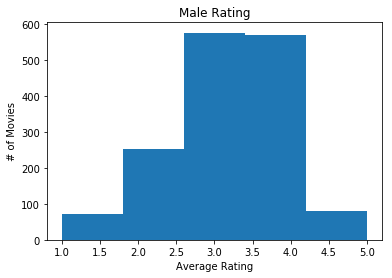

In [13]:
plt.hist(female_top_ratings['M'].dropna(), bins=5)
plt.title("Male Rating")
plt.xlabel("Average Rating")
plt.ylabel("# of Movies")
plt.show()

In [14]:
ratings_by_gender['difference'] = abs((ratings_by_gender['F']-ratings_by_gender['M']))
sorted_by_diff = ratings_by_gender.sort_values('difference',ascending=False).head(10)
top3_diff = pd.merge(sorted_by_diff, movies, on='movie_id')
top3_diff[['movie_id', 'title', 'difference']]

,movie_id,title,difference
0,1175,Hugo Pool (1997),4.000000
1,851,Two or Three Things I Know About Her (1966),3.666667
2,1429,Sliding Doors (1998),3.500000
3,641,Paths of Glory (1957),3.461538
4,1592,"Magic Hour, The (1998)",3.250000
5,853,Braindead (1992),3.125000
6,1260,Total Eclipse (1995),3.000000
7,1573,Spirits of the Dead (Tre passi nel delirio) (1...,3.000000
8,1662,Rough Magic (1995),3.000000
9,1472,"Visitors, The (Visiteurs, Les) (1993)",3.000000


In [15]:
common_ratings = ratings_by_gender.loc[ratings_by_gender['difference'] == 0]
sorted_by_zero_diff = common_ratings.sort_values('difference', ascending=False)
top3_zero_diff = pd.merge(sorted_by_zero_diff, movies, on='movie_id')
top3_zero_diff[['movie_id', 'title', 'difference']]

,movie_id,title,difference
0,34,"Doom Generation, The (1995)",0.0
1,1454,Angel and the Badman (1947),0.0
2,1297,Love Affair (1994),0.0
3,1302,Late Bloomers (1996),0.0
4,1308,Babyfever (1994),0.0
5,1359,Boys in Venice (1996),0.0
6,1377,Hotel de Love (1996),0.0
7,1382,"Bonheur, Le (1965)",0.0
8,1389,Mondo (1996),0.0
9,1408,Gordy (1995),0.0


In [16]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data = pd.read_csv('.\\ml-100k\\u.item',delimiter='|',names=m_cols,encoding='latin-1')
ratings_by_gender_full_data = pd.merge(ratings_by_gender, data, on='movie_id', how='inner')
ratings_by_gender_full_data.drop(['title','release_date', 'video_release_date','imdb_url'],axis=1,inplace=True)

In [17]:
#get all movies that have higher avg rank than 4
high_rated = movie_stats['rating'] > 4.0
high_rated_full_data = movie_stats[high_rated]
high_rated_full_pop = pd.merge(high_rated_full_data,data,on='movie_id', how='inner')
high_rated_full_pop.drop(['title','release_date', 'video_release_date','imdb_url'],axis=1,inplace=True)

#get all movies that have lower avg rank than 4
low_rated = movie_stats['rating'] < 2.0
low_rated_full_data = movie_stats[low_rated]
low_rated_full_pop = pd.merge(low_rated_full_data,data,on='movie_id', how='inner')
low_rated_full_pop.drop(['title','release_date', 'video_release_date','imdb_url'],axis=1,inplace=True)

#get all movies for females
female_rows_high_rated = ratings_by_gender_full_data['F'] > 4.0
female_full_data_high = ratings_by_gender_full_data[female_rows_high_rated]

female_rows_low_rated = ratings_by_gender_full_data['F'] < 2.0
female_full_data_low = ratings_by_gender_full_data[female_rows_low_rated]

male_rows_high_rated = ratings_by_gender_full_data['M'] > 4.0
male_full_data_high = ratings_by_gender_full_data[male_rows_high_rated]
male_rows_low_rated = ratings_by_gender_full_data['M'] < 2.0
male_full_data_low = ratings_by_gender_full_data[male_rows_low_rated]


In [18]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count_full_pop_high = {}
genres_count_female_pop_high = {}
genres_count_male_pop_high = {}

genres_count_full_pop_low = {}
genres_count_female_pop_low = {}
genres_count_male_pop_low = {}
for genre in genres:
    genre_movies_full_pop_high = high_rated_full_pop[genre] == 1
    genres_count_full_pop_high[genre] = high_rated_full_pop[genre_movies_full_pop_high].shape[0]
    genre_movies_full_pop_low = low_rated_full_pop[genre] == 1
    genres_count_full_pop_low[genre] = low_rated_full_pop[genre_movies_full_pop_low].shape[0]
    
    genre_movies_female_high = female_full_data_high[genre] == 1
    genres_count_female_pop_high[genre] = female_full_data_high[genre_movies_female_high].shape[0]
    genre_movies_female_low = female_full_data_low[genre] == 1
    genres_count_female_pop_low[genre] = female_full_data_low[genre_movies_female_low].shape[0]
    
    genre_movies_male_high = male_full_data_high[genre] == 1
    genres_count_male_pop_high[genre] = male_full_data_high[genre_movies_male_high].shape[0]
    genre_movies_male_low = male_full_data_low[genre] == 1
    genres_count_male_pop_low[genre] = male_full_data_low[genre_movies_male_low].shape[0]

In [19]:
genres_count_list_full_pop_high = sorted(genres_count_full_pop_high.items(),  key=lambda kv: kv[1], reverse=True)
genres_count_list_female_pop_high = sorted(genres_count_female_pop_high.items(), key=operator.itemgetter(1), reverse=True)
genres_count_list_male_pop_high = sorted(genres_count_male_pop_high.items(), key=operator.itemgetter(1), reverse=True)

genres_count_list_full_pop_low = sorted(genres_count_full_pop_low.items(), key=operator.itemgetter(1), reverse=True)
genres_count_list_female_pop_low = sorted(genres_count_female_pop_low.items(), key=operator.itemgetter(1), reverse=True)
genres_count_list_male_pop_low = sorted(genres_count_male_pop_low.items(), key=operator.itemgetter(1), reverse=True)


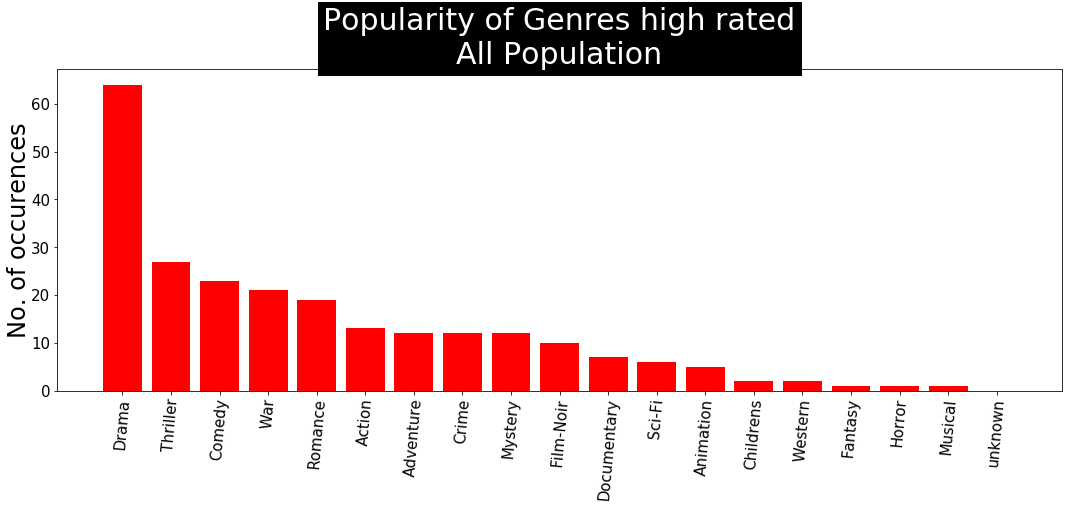

[('Drama', 64), ('Thriller', 27), ('Comedy', 23), ('War', 21), ('Romance', 19), ('Action', 13), ('Adventure', 12), ('Crime', 12), ('Mystery', 12), ('Film-Noir', 10), ('Documentary', 7), ('Sci-Fi', 6), ('Animation', 5), ('Childrens', 2), ('Western', 2), ('Fantasy', 1), ('Horror', 1), ('Musical', 1), ('unknown', 0)]


In [20]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_full_pop_high]
x_axis = [i for i in range(len(genres_count_full_pop_high))]
x_label = [genre[0] for genre in genres_count_list_full_pop_high]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres high rated\nAll Population", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_full_pop_high)

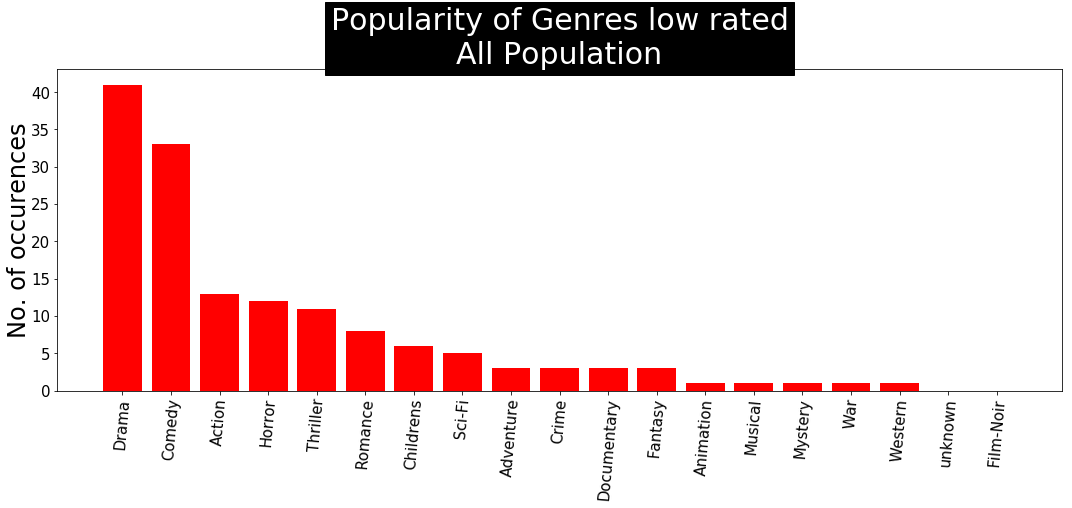

[('Drama', 41), ('Comedy', 33), ('Action', 13), ('Horror', 12), ('Thriller', 11), ('Romance', 8), ('Childrens', 6), ('Sci-Fi', 5), ('Adventure', 3), ('Crime', 3), ('Documentary', 3), ('Fantasy', 3), ('Animation', 1), ('Musical', 1), ('Mystery', 1), ('War', 1), ('Western', 1), ('unknown', 0), ('Film-Noir', 0)]


In [21]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_full_pop_low]
x_axis = [i for i in range(len(genres_count_full_pop_low))]
x_label = [genre[0] for genre in genres_count_list_full_pop_low]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres low rated\nAll Population", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_full_pop_low)

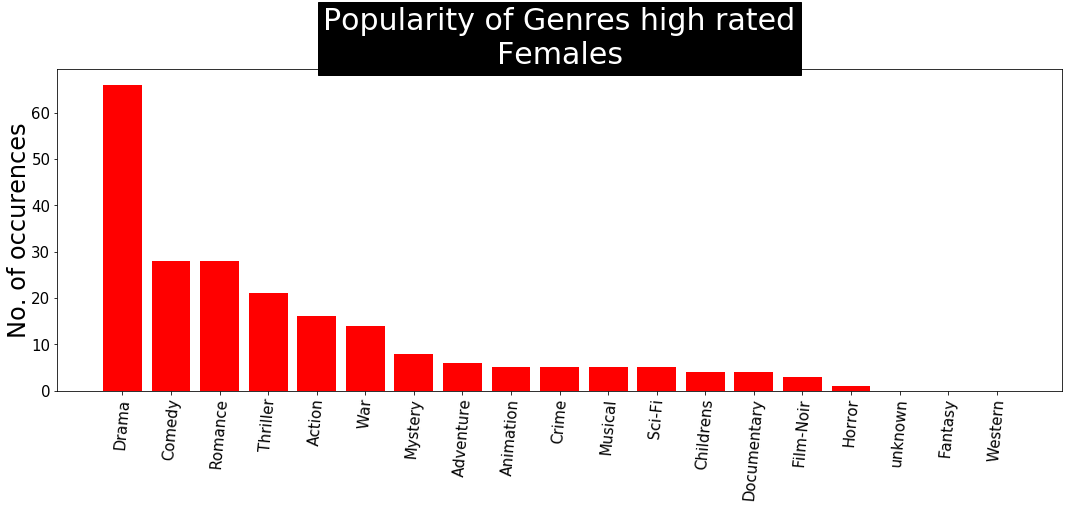

[('Drama', 66), ('Comedy', 28), ('Romance', 28), ('Thriller', 21), ('Action', 16), ('War', 14), ('Mystery', 8), ('Adventure', 6), ('Animation', 5), ('Crime', 5), ('Musical', 5), ('Sci-Fi', 5), ('Childrens', 4), ('Documentary', 4), ('Film-Noir', 3), ('Horror', 1), ('unknown', 0), ('Fantasy', 0), ('Western', 0)]


In [22]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_female_pop_high]
x_axis = [i for i in range(len(genres_count_female_pop_high))]
x_label = [genre[0] for genre in genres_count_list_female_pop_high]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres high rated\nFemales", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_female_pop_high)

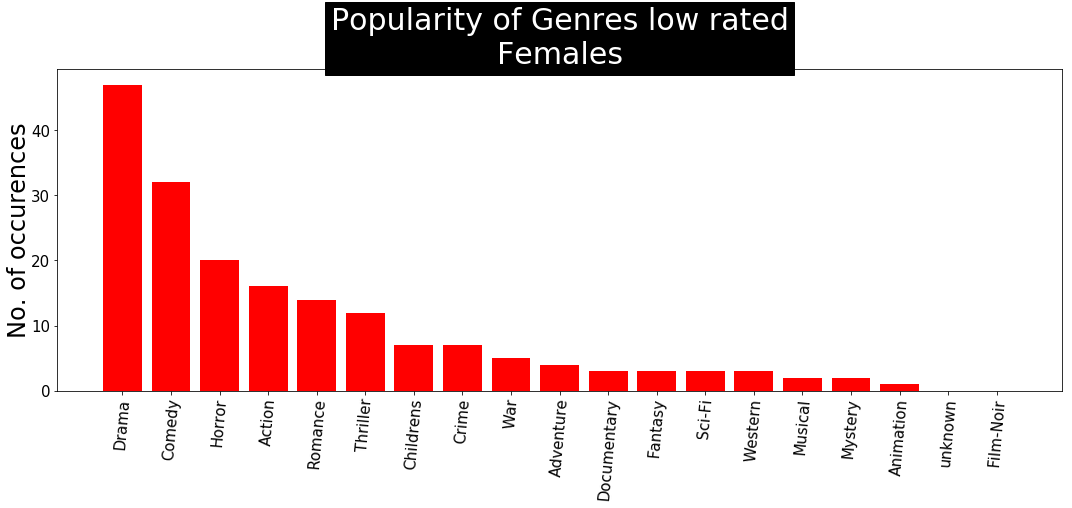

[('Drama', 47), ('Comedy', 32), ('Horror', 20), ('Action', 16), ('Romance', 14), ('Thriller', 12), ('Childrens', 7), ('Crime', 7), ('War', 5), ('Adventure', 4), ('Documentary', 3), ('Fantasy', 3), ('Sci-Fi', 3), ('Western', 3), ('Musical', 2), ('Mystery', 2), ('Animation', 1), ('unknown', 0), ('Film-Noir', 0)]


In [23]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_female_pop_low]
x_axis = [i for i in range(len(genres_count_female_pop_low))]
x_label = [genre[0] for genre in genres_count_list_female_pop_low]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres low rated\nFemales", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_female_pop_low)

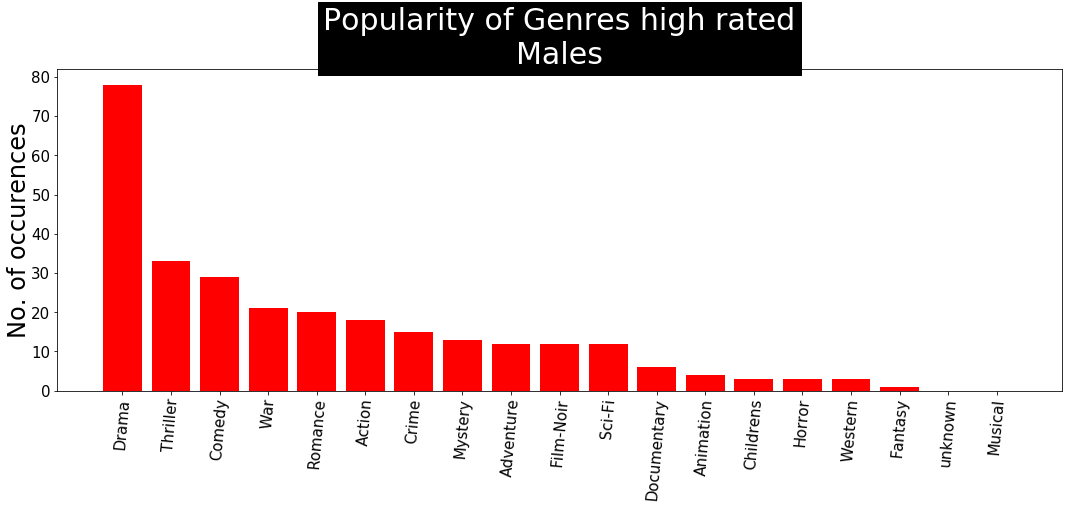

[('Drama', 78), ('Thriller', 33), ('Comedy', 29), ('War', 21), ('Romance', 20), ('Action', 18), ('Crime', 15), ('Mystery', 13), ('Adventure', 12), ('Film-Noir', 12), ('Sci-Fi', 12), ('Documentary', 6), ('Animation', 4), ('Childrens', 3), ('Horror', 3), ('Western', 3), ('Fantasy', 1), ('unknown', 0), ('Musical', 0)]


In [24]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_male_pop_high]
x_axis = [i for i in range(len(genres_count_male_pop_high))]
x_label = [genre[0] for genre in genres_count_list_male_pop_high]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres high rated\nMales", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_male_pop_high)

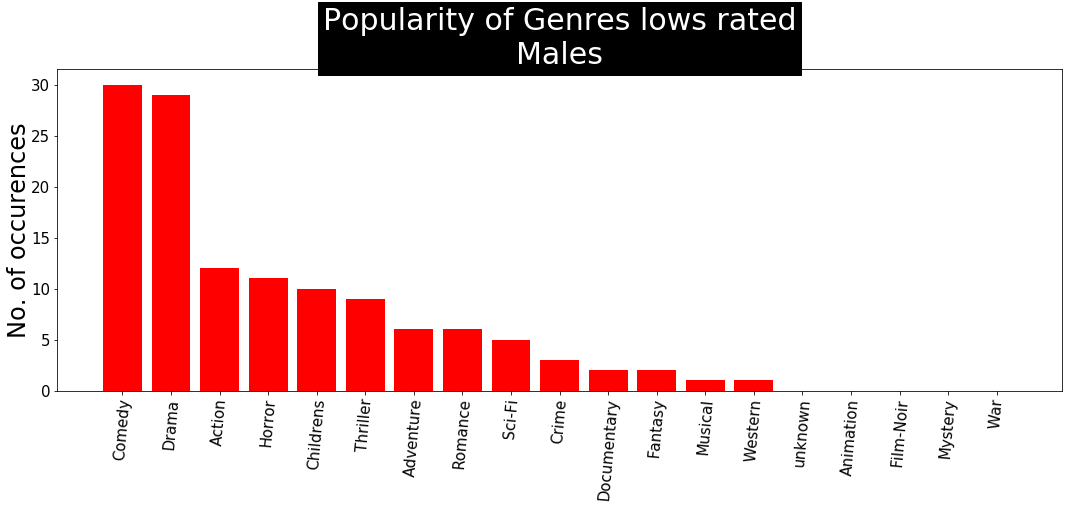

[('Comedy', 30), ('Drama', 29), ('Action', 12), ('Horror', 11), ('Childrens', 10), ('Thriller', 9), ('Adventure', 6), ('Romance', 6), ('Sci-Fi', 5), ('Crime', 3), ('Documentary', 2), ('Fantasy', 2), ('Musical', 1), ('Western', 1), ('unknown', 0), ('Animation', 0), ('Film-Noir', 0), ('Mystery', 0), ('War', 0)]


In [25]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list_male_pop_low]
x_axis = [i for i in range(len(genres_count_male_pop_low))]
x_label = [genre[0] for genre in genres_count_list_male_pop_low]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres lows rated\nMales", bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()
print(genres_count_list_male_pop_low)

In [27]:
movie_stats0 = movie_ratings.groupby('movie_id', as_index=False)['rating'].mean()
movie_stats1 = movie_ratings.groupby('movie_id', as_index=False)['rating'].count()
movie_stats1.columns = ['movie_id','num_of_ratings']
movie_pop = pd.merge(movie_stats0, movie_stats1, on='movie_id')

In [28]:
movie_pop['popularity']=(movie_pop['rating']*movie_pop['num_of_ratings'])/(users.shape[0]*5)
sorted_by_pop = movie_pop.sort_values('popularity', ascending=False)

In [30]:
popularity_with_names = pd.merge(sorted_by_pop,movies,on='movie_id',how='inner')
popularity_with_names[['movie_id','title','popularity','rating','num_of_ratings']]

,movie_id,title,popularity,rating,num_of_ratings
0,50,Star Wars (1977),0.447508,4.359504,484
1,181,Return of the Jedi (1983),0.359067,4.011848,422
2,100,Fargo (1996),0.344221,4.108861,395
3,258,Contact (1997),0.325981,3.823383,402
4,1,Toy Story (1995),0.316225,3.892950,383
5,174,Raiders of the Lost Ark (1981),0.309862,4.247093,344
6,127,"Godfather, The (1972)",0.307105,4.258824,340
7,286,"English Patient, The (1996)",0.299682,3.641753,388
8,288,Scream (1996),0.285684,3.445013,391
9,300,Air Force One (1997),0.272959,3.656250,352
